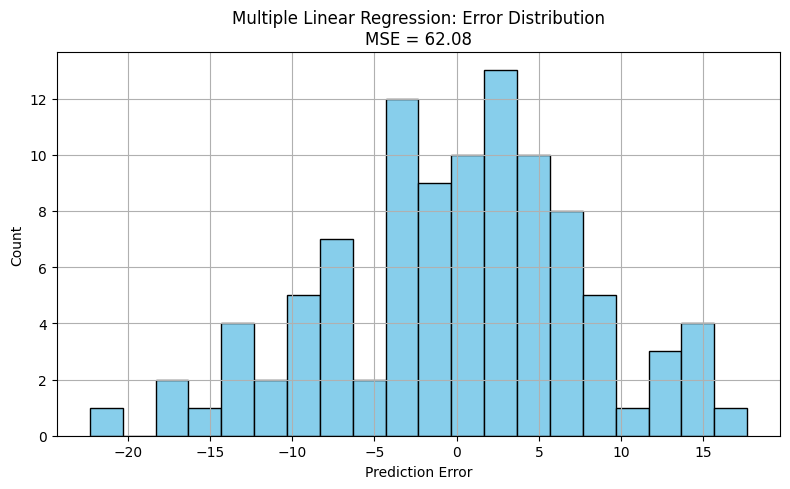

In [2]:
"""
Multiple Linear Regression Demo
-------------------------------
This script demonstrates fitting a multiple linear regression model to synthetic data.
We simulate house price prediction using house size and season (2 features).
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(1)
size = np.random.uniform(50, 150, 100).reshape(-1, 1)      # House size
season = np.random.randint(0, 2, 100).reshape(-1, 1)       # 0 = Winter, 1 = Summer
X = np.hstack([size, season])                              # Combine features

# Target: price = 3*size + 5*season + 20 + noise
noise = np.random.normal(0, 8, 100).reshape(-1, 1)
y = 3 * size + 5 * season + 20 + noise

# Fit multiple linear regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)

# Plot prediction error histogram
plt.figure(figsize=(8, 5))
errors = y - y_pred
plt.hist(errors, bins=20, color="skyblue", edgecolor="black")
plt.title(f"Multiple Linear Regression: Error Distribution\nMSE = {mse:.2f}")
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()